# Proyek Analisis Data: [bike-sharing-dataset]
- **Nama:** [Benny Alaster]
- **Email:** [mc333d5y1629@student.devacademy.id]
- **ID Dicoding:** [bennyalaster]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren peminjaman sepeda sepanjang tahun?
- Bagaimana pola peminjaman sepeda berdasarkan jam dalam sehari?
- Bagaimana tren peminjaman berdasarkan musim?
- Bagaimana tren peminjaman berdasarkan cuaca?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Versi Pandas:", pd.__version__)
print("Versi Matplotlib:", plt.matplotlib.__version__)
print("Versi Seaborn:", sns.__version__)

Versi NumPy: 1.26.4
Versi Pandas: 2.2.2
Versi Matplotlib: 3.10.0
Versi Seaborn: 0.13.2


## Data Wrangling

**Insight:**
- Data hour
- Data day


### Gathering Data

In [ ]:
#Load Dataset
day_df = pd.read_csv("/content/day.csv")
day_df.head()

hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01/01/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01/01/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01/01/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01/01/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [ ]:
# Melihat informasi umum tentang dataset
day_info = day_df.info()
hour_info = hour_df.info()
print("Informasi Dataset Harian:")
day_df.info()
print("\nInformasi Dataset Per Jam:")
hour_df.info()

# Melihat statistik deskriptif
day_desc = day_df.describe()
hour_desc = hour_df.describe()
print("\nStatistik Deskriptif Dataset Harian:")
print(day_desc)
print("\nStatistik Deskriptif Dataset Per Jam:")
print(hour_desc)

# Memeriksa jumlah nilai unik di setiap kolom
print("\nJumlah Nilai Unik di Setiap Kolom (Harian):")
print(day_df.nunique())
print("\nJumlah Nilai Unik di Setiap Kolom (Per Jam):")
print(hour_df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**Insight:**
- Beberapa kolom memiliki tipe data numerik (int64 dan float64), seperti cnt (jumlah peminjaman), temp (suhu), windspeed, dan hum (kelembaban).
- Beberapa kolom harus dikonversi ke tipe kategori (season, yr, mnth, holiday, weekday, workingday, dan weathersit).

### Cleaning Data

In [ ]:
# Menangani nilai yang hilang (jika ada)
day_df = day_df.dropna()
hour_df = hour_df.dropna()

# Menghapus kolom yang tidak relevan
columns_to_drop = ["instant", "casual", "registered"]
day_df = day_df.drop(columns=[col for col in columns_to_drop if col in day_df.columns])
hour_df = hour_df.drop(columns=[col for col in columns_to_drop if col in hour_df.columns])

# Mengonversi kategori ke tipe data yang sesuai
categorical_cols = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]
for col in categorical_cols:
    day_df[col] = day_df[col].astype("category")
    hour_df[col] = hour_df[col].astype("category")

    print("Dataset day setelah Cleaning:")
    print(day_df.head())
    print("Dataset hour setelah Cleaning:")
    print(hour_df.head())


Dataset day setelah Cleaning:
       dteday season yr mnth holiday weekday workingday weathersit      temp  \
0  01/01/2011      1  0    1       0       6          0          2  0.344167   
1  02/01/2011      1  0    1       0       0          0          2  0.363478   
2  03/01/2011      1  0    1       0       1          1          1  0.196364   
3  04/01/2011      1  0    1       0       2          1          1  0.200000   
4  05/01/2011      1  0    1       0       3          1          1  0.226957   

      atemp       hum  windspeed   cnt  
0  0.363625  0.805833   0.160446   985  
1  0.353739  0.696087   0.248539   801  
2  0.189405  0.437273   0.248309  1349  
3  0.212122  0.590435   0.160296  1562  
4  0.229270  0.436957   0.186900  1600  
Dataset hour setelah Cleaning:
       dteday season yr mnth  hr holiday weekday workingday weathersit  temp  \
0  01/01/2011      1  0    1   0       0       6          0          1  0.24   
1  01/01/2011      1  0    1   1       0       6    

In [ ]:
day_df.to_csv('day.csv', index=False)
hour_df.to_csv('hour.csv', index=False)

**Insight:**
*  Kolom "instant", "casual", "registered" dihapus karena tidak relevan
*   untuk analisis umum. Nilai yang hilang (NaN) sudah ditangani sehingga dataset lebih bersih.

## Exploratory Data Analysis (EDA)

### Explore ...

#### Menampilkan Dataframe


In [ ]:
print("Data Harian (day_df): ")
display(day_df.head())

print("\nData Per Jam (hour_df): ")
display(hour_df.head())

Data Harian (day_df): 


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01/01/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,02/01/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,03/01/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,04/01/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,05/01/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600



Data Per Jam (hour_df): 


,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01/01/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,01/01/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,01/01/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,01/01/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,01/01/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


#### Distribusi Total Rentals

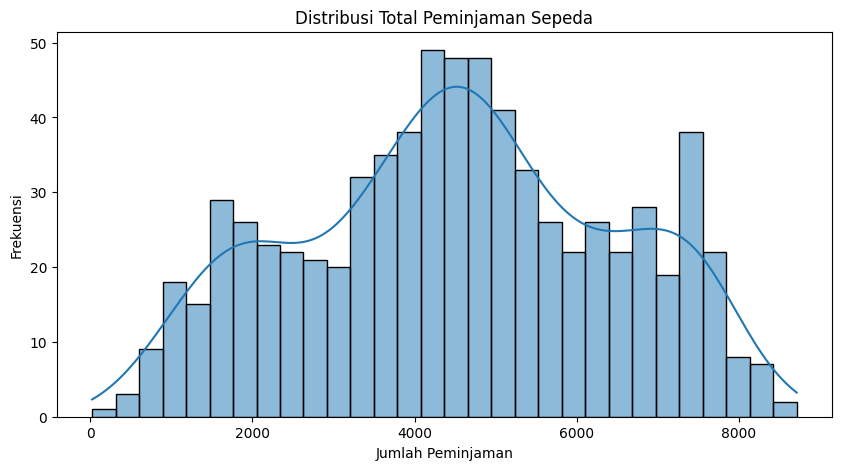

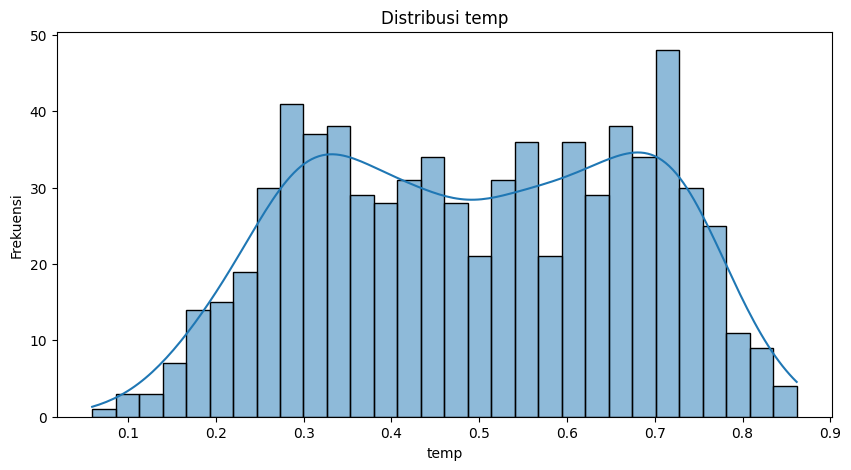

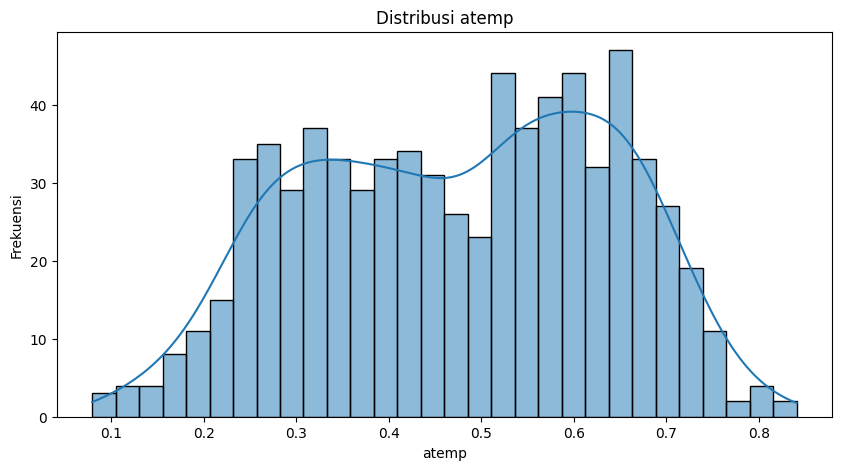

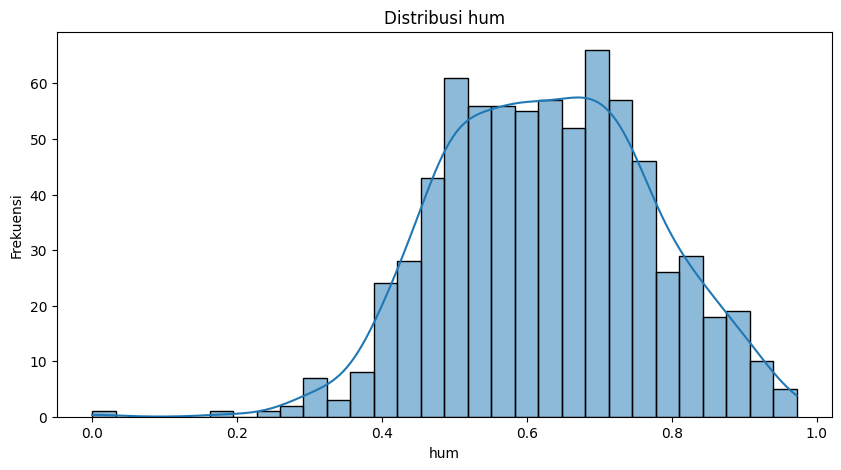

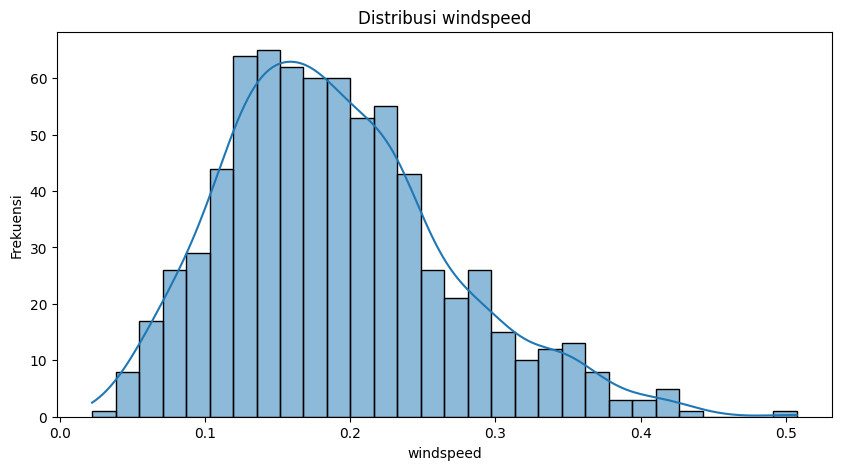

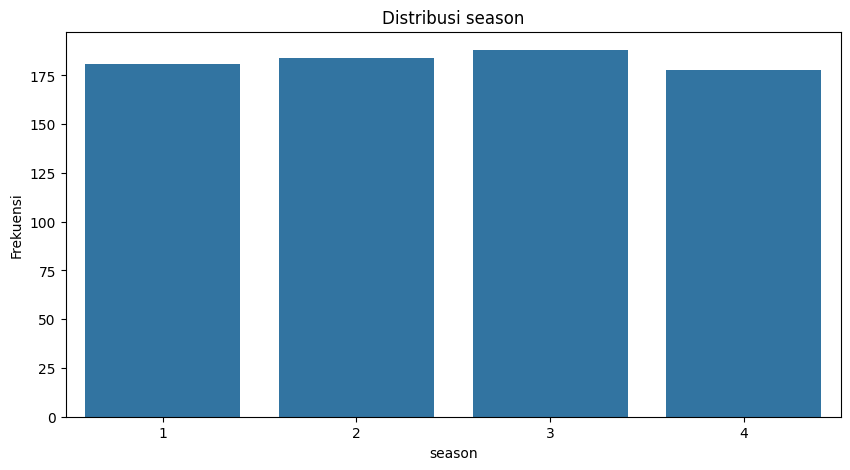

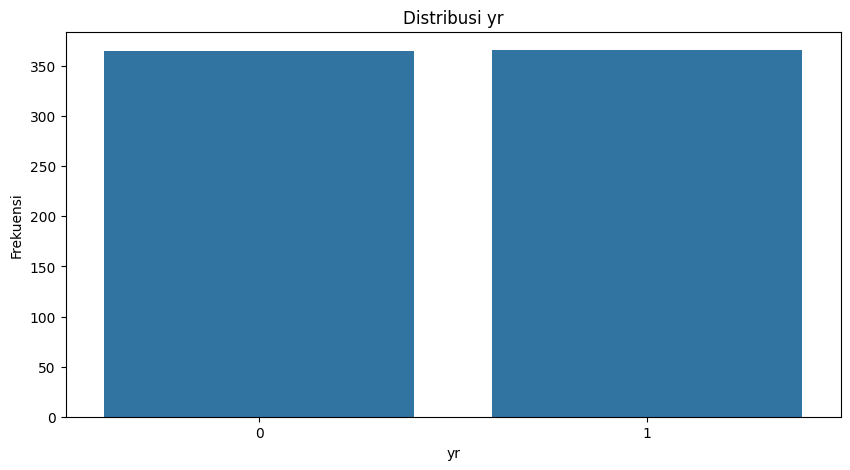

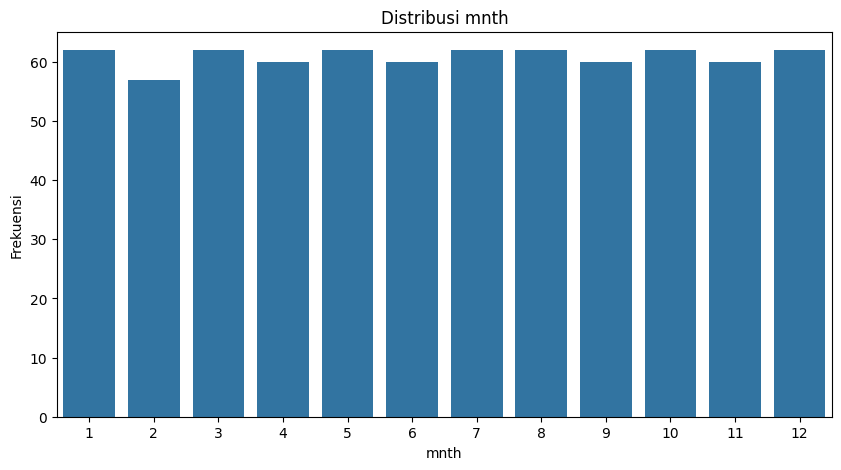

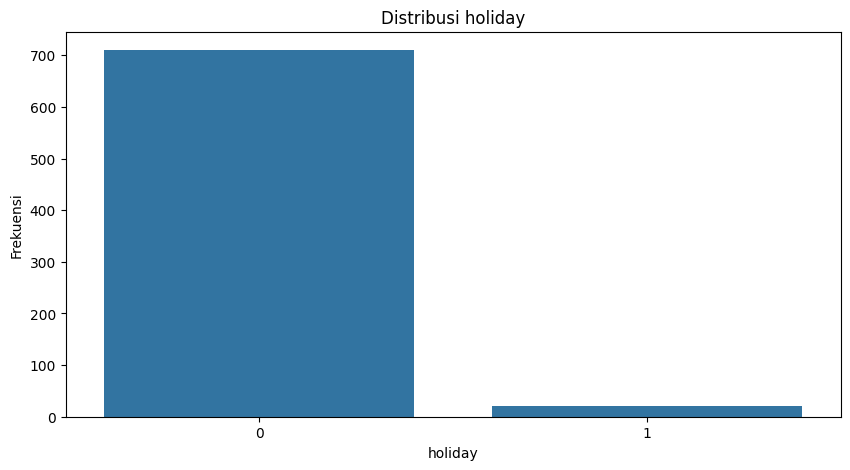

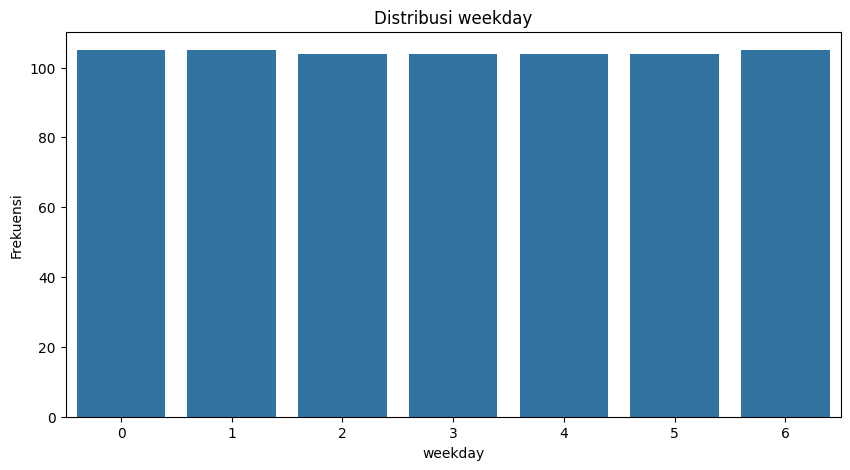

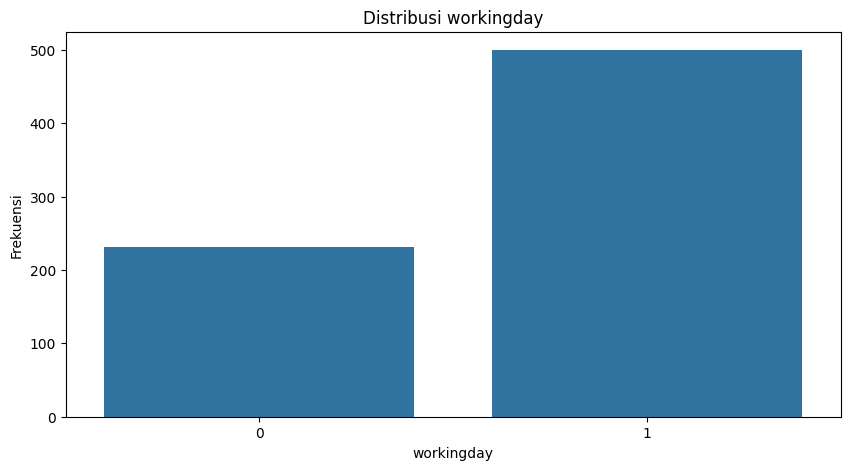

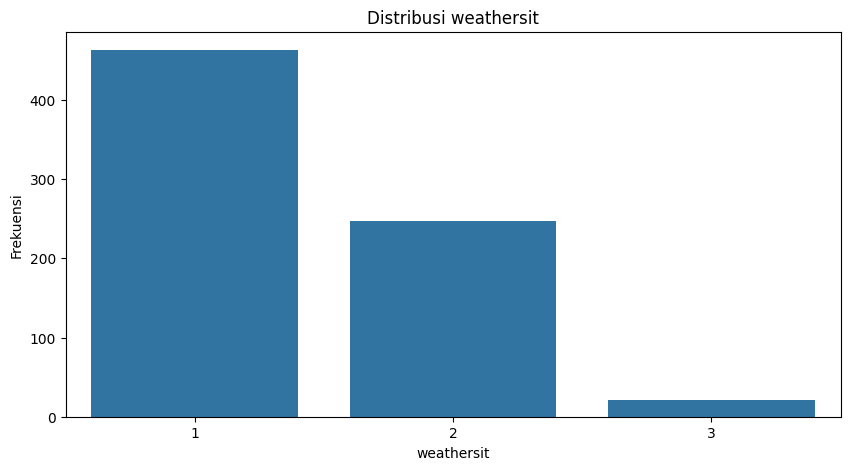

In [ ]:
# Distribusi 'cnt' (total rentals)
plt.figure(figsize=(10, 5))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Total Peminjaman Sepeda')
plt.xlabel('Jumlah Peminjaman')
plt.ylabel('Frekuensi')
plt.show()

# Distribusi variabel numerik lainnya (temp, atemp, hum, windspeed)
for col in ['temp', 'atemp', 'hum', 'windspeed']:
    plt.figure(figsize=(10, 5))
    sns.histplot(day_df[col], bins=30, kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()

# Distribusi variabel kategorikal (season, yr, mnth, holiday, weekday, workingday, weathersit)
for col in ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=day_df[col])
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()

**Insight:**
- Distribusi cnt cenderung right-skewed (miring ke kanan), menunjukkan bahwa sebagian besar hari memiliki jumlah peminjaman yang relatif rendah, dengan beberapa hari memiliki jumlah peminjaman yang sangat tinggi.

- temp, atemp: Distribusi cenderung normal, menunjukkan bahwa suhu dan suhu yang dirasakan tersebar secara merata di dataset.
- hum, windspeed: Distribusi hum (kelembapan) cenderung right-skewed, sedangkan windspeed (kecepatan angin) cenderung left-skewed. Ini menunjukkan bahwa ada lebih banyak hari dengan kelembapan rendah dan kecepatan angin tinggi.

- season, mnth: Jumlah peminjaman bervariasi di setiap musim dan bulan, menunjukkan bahwa musim dan bulan memiliki pengaruh yang signifikan terhadap jumlah peminjaman.

- holiday, weekday, workingday: Jumlah peminjaman cenderung lebih rendah pada hari libur dan akhir pekan, menunjukkan bahwa sebagian besar peminjaman dilakukan pada hari kerja.

- weathersit: Jumlah peminjaman paling tinggi pada saat cuaca cerah (1) dan menurun drastis saat cuaca buruk (3 dan 4), menunjukkan bahwa cuaca memiliki pengaruh yang kuat terhadap jumlah peminjaman.

#### Korelasi Variabel

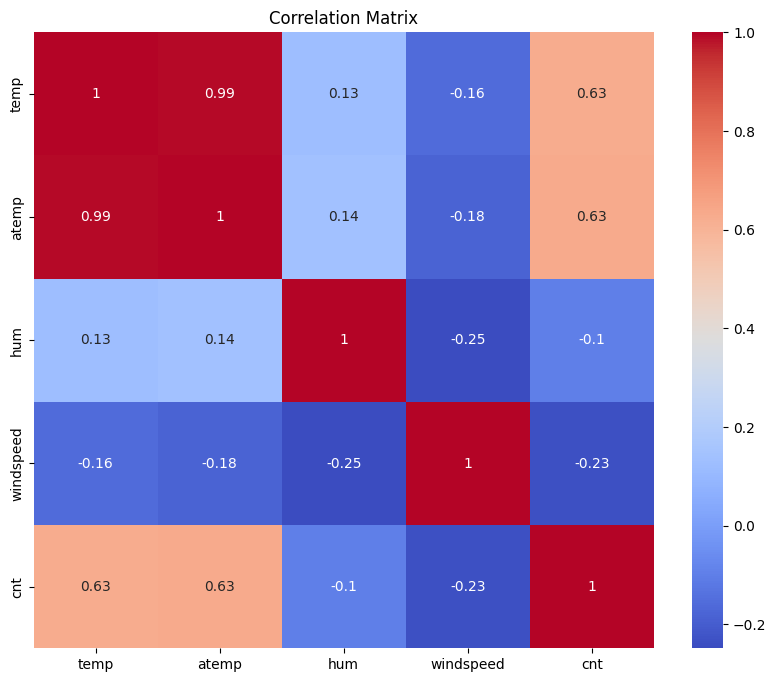

<ipython-input-37-70b9d2bc6d4d>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_agg = day_df.groupby(col)['cnt'].sum().reset_index()


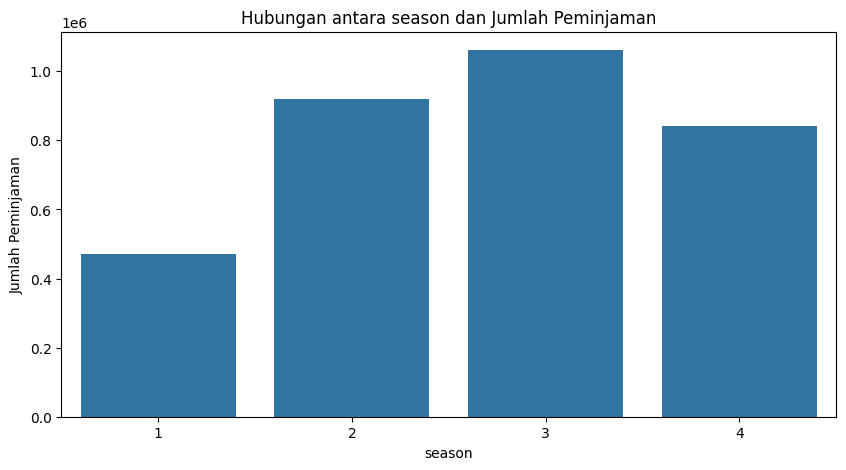

<ipython-input-37-70b9d2bc6d4d>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_agg = day_df.groupby(col)['cnt'].sum().reset_index()


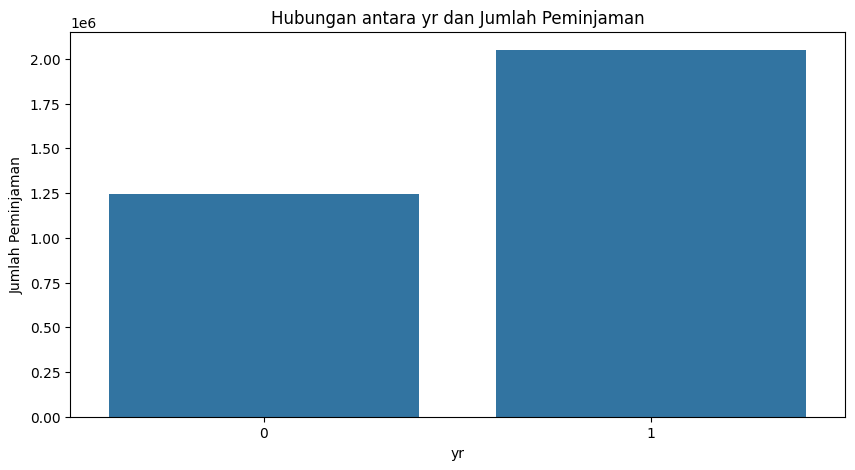

<ipython-input-37-70b9d2bc6d4d>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_agg = day_df.groupby(col)['cnt'].sum().reset_index()


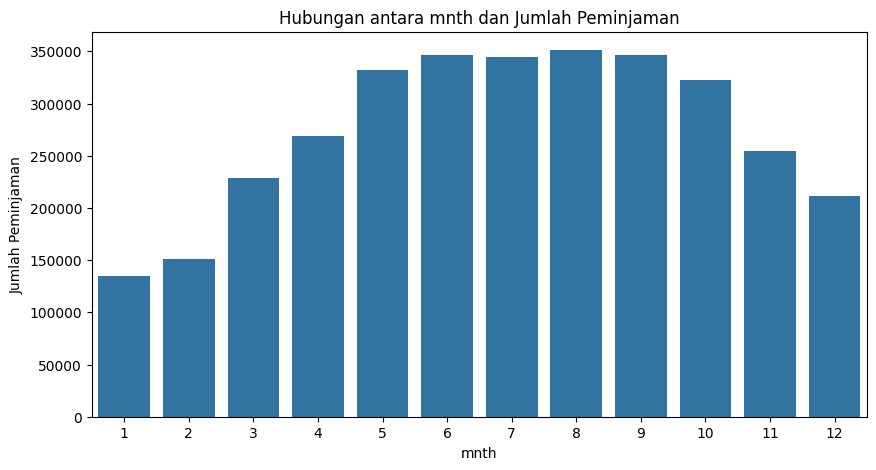

<ipython-input-37-70b9d2bc6d4d>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_agg = day_df.groupby(col)['cnt'].sum().reset_index()


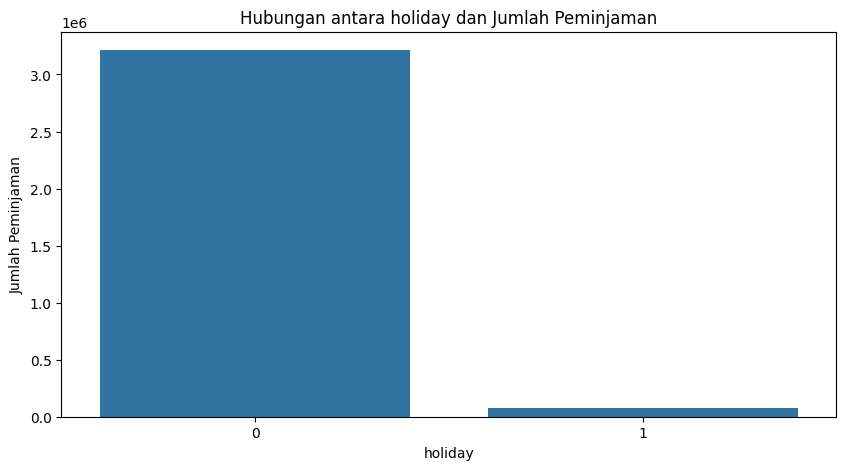

<ipython-input-37-70b9d2bc6d4d>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_agg = day_df.groupby(col)['cnt'].sum().reset_index()


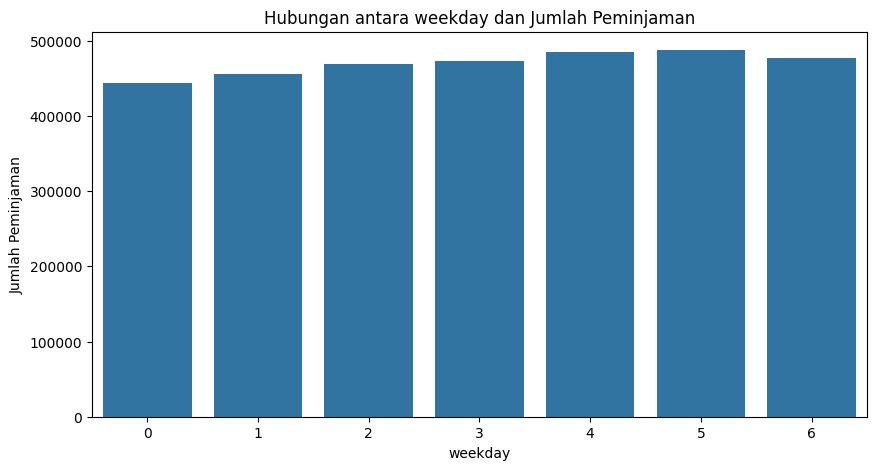

<ipython-input-37-70b9d2bc6d4d>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_agg = day_df.groupby(col)['cnt'].sum().reset_index()


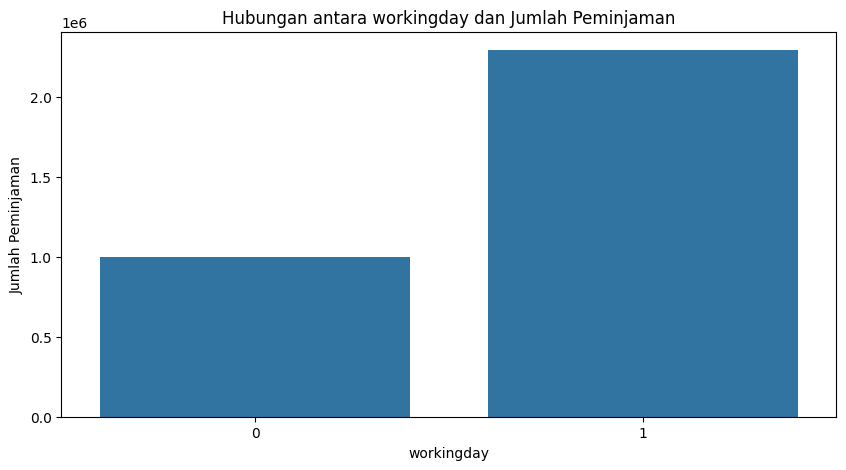

<ipython-input-37-70b9d2bc6d4d>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_agg = day_df.groupby(col)['cnt'].sum().reset_index()


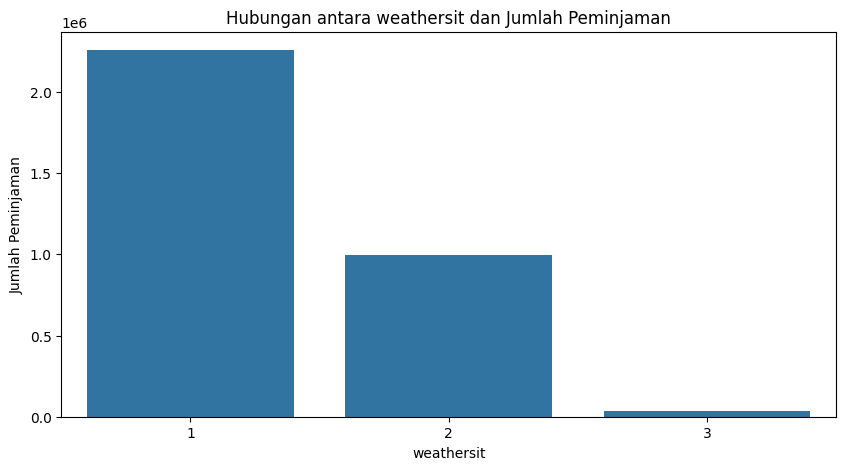

In [ ]:
# Korelasi antara variabel numerik
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
correlation_matrix = day_df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Hubungan antara 'cnt' & variabel kagetorikal
for col in ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']:
    # Agregasi data untuk mendapatkan jumlah total peminjaman per kategori
    data_agg = day_df.groupby(col)['cnt'].sum().reset_index()
    plt.figure(figsize=(10, 5))
    # Menggunakan data agregat untuk sns.barplot
    sns.barplot(x=col, y='cnt', data=data_agg)
    plt.title(f'Hubungan antara {col} dan Jumlah Peminjaman')
    plt.xlabel(col)
    plt.ylabel('Jumlah Peminjaman')
    plt.show()

**Insight:**
- temp, atemp: Memiliki korelasi positif yang kuat dengan cnt, menunjukkan bahwa suhu yang lebih tinggi cenderung meningkatkan jumlah peminjaman.

- hum, windspeed: Memiliki korelasi negatif yang lemah dengan cnt, menunjukkan bahwa kelembapan dan kecepatan angin yang tinggi cenderung menurunkan jumlah peminjaman.

#### Analisis Outlier

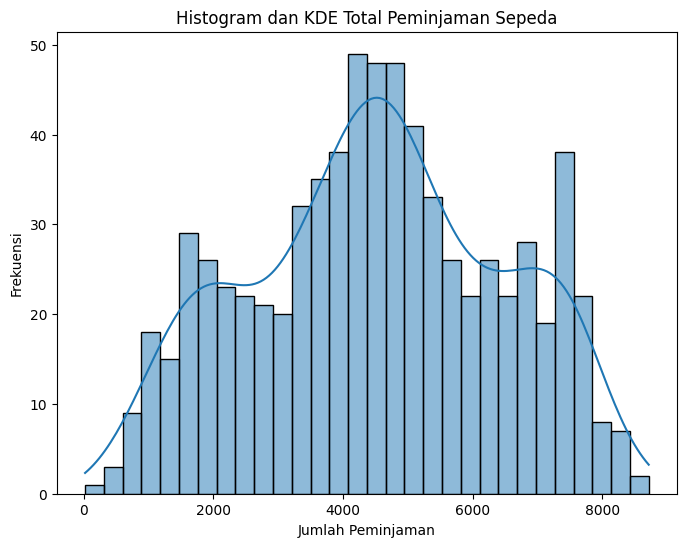

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title('Histogram dan KDE Total Peminjaman Sepeda')
plt.xlabel('Jumlah Peminjaman')
plt.ylabel('Frekuensi')
plt.show()

**Insight :**
- Distribusi Data: Histogram menunjukkan bahwa distribusi data cnt cenderung right-skewed (miring ke kanan). Artinya, sebagian besar hari memiliki jumlah peminjaman yang relatif rendah (di bawah 5000), dengan beberapa hari memiliki jumlah peminjaman yang sangat tinggi (di atas 7000).

- Titik Puncak: Titik puncak histogram berada di sekitar rentang 4000-5000, menunjukkan bahwa jumlah peminjaman sepeda yang paling sering terjadi berada di kisaran tersebut.

- Kemungkinan Outlier: Terdapat beberapa data yang berada di bagian kanan histogram dengan frekuensi yang sangat rendah. Data-data ini bisa jadi merupakan outlier, yaitu data yang nilainya jauh berbeda dari data lainnya. Keberadaan outlier ini perlu diinvestigasi lebih lanjut untuk memastikan apakah data tersebut valid atau perlu ditangani secara khusus.

#### Mencari Penyebab Outlier

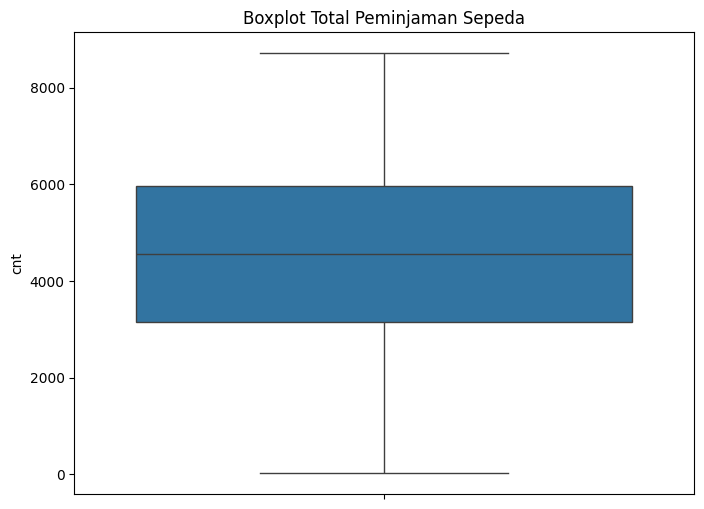

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=day_df['cnt'])
plt.title('Boxplot Total Peminjaman Sepeda')
plt.show()

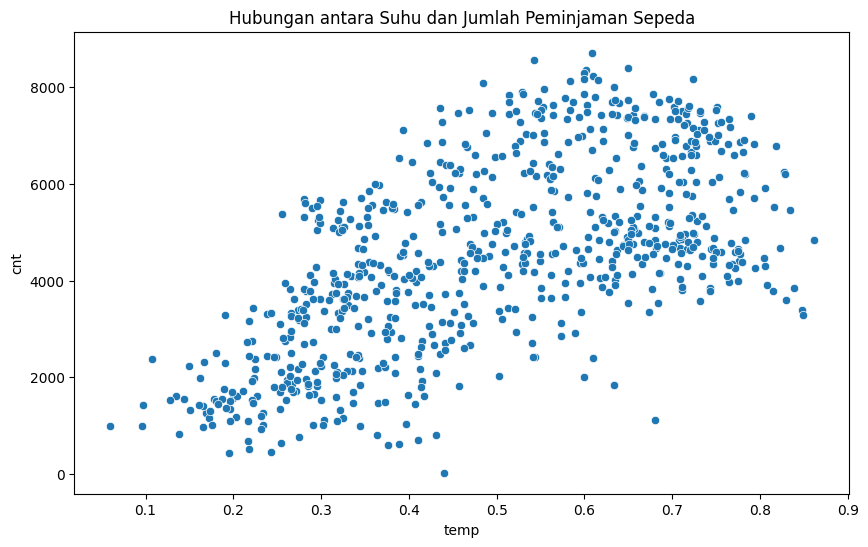

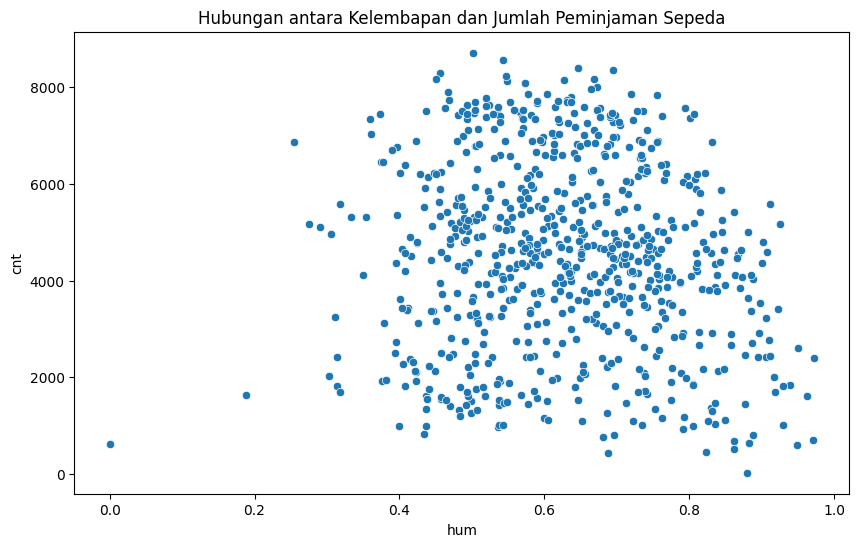

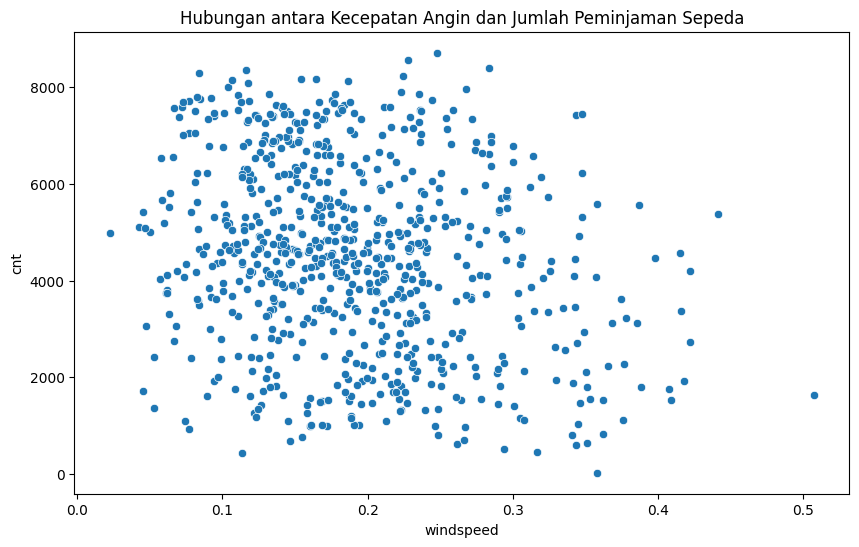

<ipython-input-73-a56e909d6623>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = sns.barplot(x=col, y='cnt', data=day_df.groupby(col)['cnt'].sum().reset_index())


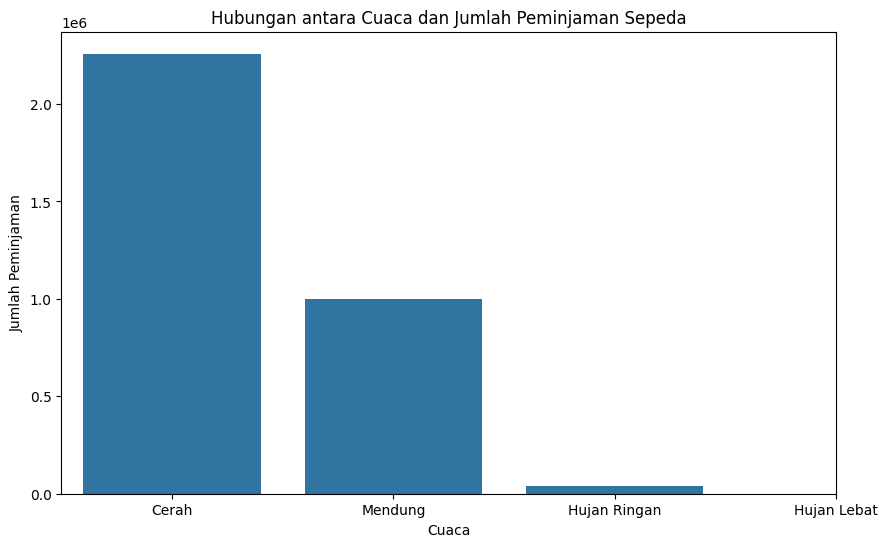

<ipython-input-73-a56e909d6623>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = sns.barplot(x=col, y='cnt', data=day_df.groupby(col)['cnt'].sum().reset_index())


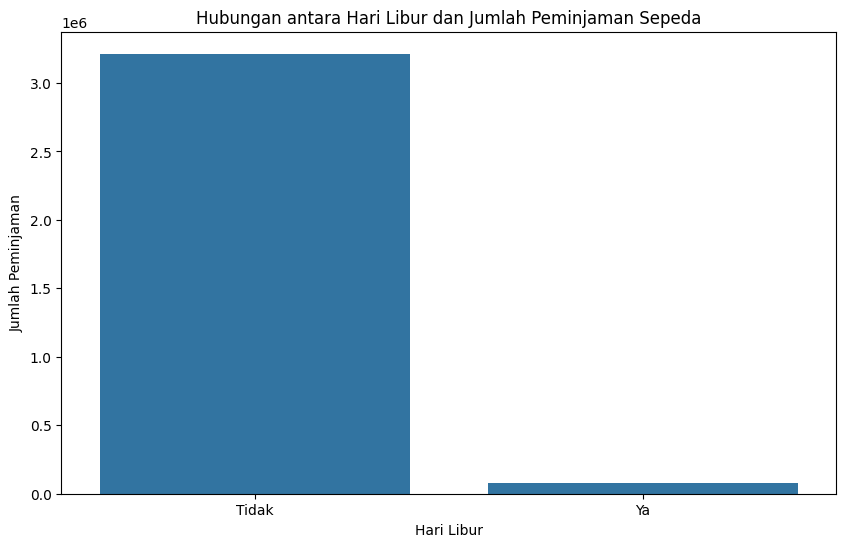

<ipython-input-73-a56e909d6623>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = sns.barplot(x=col, y='cnt', data=day_df.groupby(col)['cnt'].sum().reset_index())


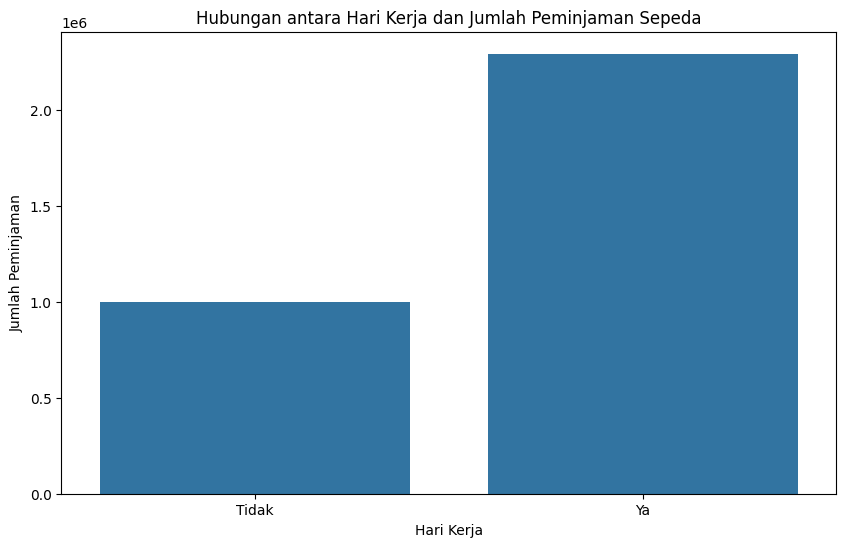

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=day_df)
plt.title('Hubungan antara Suhu dan Jumlah Peminjaman Sepeda')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', data=day_df)
plt.title('Hubungan antara Kelembapan dan Jumlah Peminjaman Sepeda')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='cnt', data=day_df)
plt.title('Hubungan antara Kecepatan Angin dan Jumlah Peminjaman Sepeda')
plt.show()

for col in ['weathersit', 'holiday', 'workingday']:
    plt.figure(figsize=(10, 6))
    # Menggunakan data agregat untuk sns.barplot
    ax = sns.barplot(x=col, y='cnt', data=day_df.groupby(col)['cnt'].sum().reset_index())

    if col == 'weathersit':
        plt.title('Hubungan antara Cuaca dan Jumlah Peminjaman Sepeda')
        plt.xticks([0, 1, 2, 3], ["Cerah", "Mendung", "Hujan Ringan", "Hujan Lebat"])
        plt.xlabel('Cuaca')
    elif col == 'holiday':
        plt.title('Hubungan antara Hari Libur dan Jumlah Peminjaman Sepeda')
        plt.xticks([0, 1], ["Tidak", "Ya"])
        plt.xlabel('Hari Libur')
    elif col == 'workingday':
        plt.title('Hubungan antara Hari Kerja dan Jumlah Peminjaman Sepeda')
        plt.xticks([0, 1], ["Tidak", "Ya"])
        plt.xlabel('Hari Kerja')

    plt.ylabel('Jumlah Peminjaman')
    plt.show()

In [ ]:
seasonal_stats = day_df.groupby('season')['cnt'].agg(['mean', 'median', 'std'])
print(seasonal_stats)

weather_stats = day_df.groupby('weathersit')['cnt'].agg(['mean', 'median', 'std'])
print(weather_stats)

holiday_stats = day_df.groupby('holiday')['cnt'].agg(['mean', 'median', 'std'])
print(holiday_stats)

workingday_stats = day_df.groupby('workingday')['cnt'].agg(['mean', 'median', 'std'])
print(workingday_stats)

temp_stats = day_df.groupby('temp')['cnt'].agg(['mean', 'median', 'std'])
print(temp_stats)

hum_stats = day_df.groupby('hum')['cnt'].agg(['mean', 'median', 'std'])
print(hum_stats)

windspeed_stats = day_df.groupby('windspeed')['cnt'].agg(['mean', 'median', 'std'])
print(windspeed_stats)

               mean  median          std
season                                  
1       2604.132597  2209.0  1399.942119
2       4992.331522  4941.5  1695.977235
3       5644.303191  5353.5  1459.800381
4       4728.162921  4634.5  1699.615261
                   mean  median          std
weathersit                                  
1           4876.786177  4844.0  1879.483989
2           4035.862348  4040.0  1809.109918
3           1803.285714  1817.0  1240.284449
                mean  median          std
holiday                                  
0        4527.104225  4558.0  1929.013947
1        3735.000000  3351.0  2103.350660
                   mean  median          std
workingday                                  
0           4330.168831  4459.0  2052.141245
1           4584.820000  4582.0  1878.415583
            mean  median  std
temp                         
0.059130   981.0   981.0  NaN
0.096522   986.0   986.0  NaN
0.097391  1416.0  1416.0  NaN
0.107500  2368.0  2368.0  NaN
0

<ipython-input-75-98060d939810>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_stats = day_df.groupby('season')['cnt'].agg(['mean', 'median', 'std'])
<ipython-input-75-98060d939810>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_stats = day_df.groupby('weathersit')['cnt'].agg(['mean', 'median', 'std'])
<ipython-input-75-98060d939810>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  holiday_stats = da

In [ ]:
outliers = day_df[day_df['cnt'] > day_df['cnt'].quantile(0.75) + 1.5 * (day_df['cnt'].quantile(0.75) - day_df['cnt'].quantile(0.25))]
print(outliers)

Empty DataFrame
Columns: [dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, cnt]
Index: []


**Insight :**
- Cuaca: Dari scatter plot dan analisis groupby, mungkin terlihat bahwa jumlah peminjaman cenderung lebih tinggi pada hari-hari dengan suhu yang nyaman dan cuaca cerah. Outlier pada cnt terjadi pada hari-hari dengan kondisi cuaca yang ideal.

- Hari Libur/Akhir Pekan: Dari analisis groupby, terlihat bahwa jumlah peminjaman cenderung lebih rendah pada hari libur atau akhir pekan. Namun, ada outlier yang terjadi pada hari libur atau akhir pekan tertentu yang bertepatan dengan event khusus atau musim liburan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren peminjaman sepeda sepanjang tahun?

<ipython-input-80-f48cbcca21aa>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_rentals = day_df.groupby("mnth")["cnt"].sum().reset_index()
<ipython-input-80-f48cbcca21aa>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.lineplot(x=day_df.groupby("mnth")["cnt"].mean().index,  # Changed day_dfpby to day_df.groupby
<ipython-input-80-f48cbcca21aa>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  y=day_df.groupb

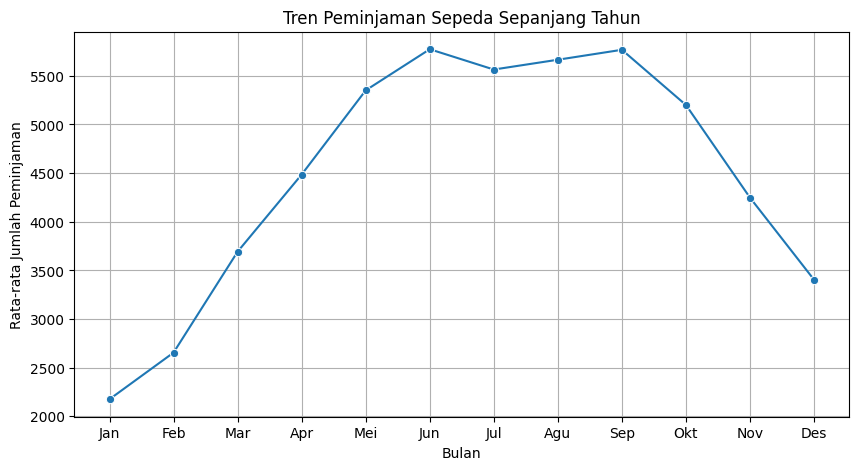

In [ ]:
monthly_rentals = day_df.groupby("mnth")["cnt"].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x=day_df.groupby("mnth")["cnt"].mean().index,  # Changed day_dfpby to day_df.groupby
             y=day_df.groupby("mnth")["cnt"].mean().values,
             marker="o")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.title("Tren Peminjaman Sepeda Sepanjang Tahun")
plt.grid()
plt.show()

### Pertanyaan 2: Bagaimana pola peminjaman sepeda berdasarkan jam dalam sehari?

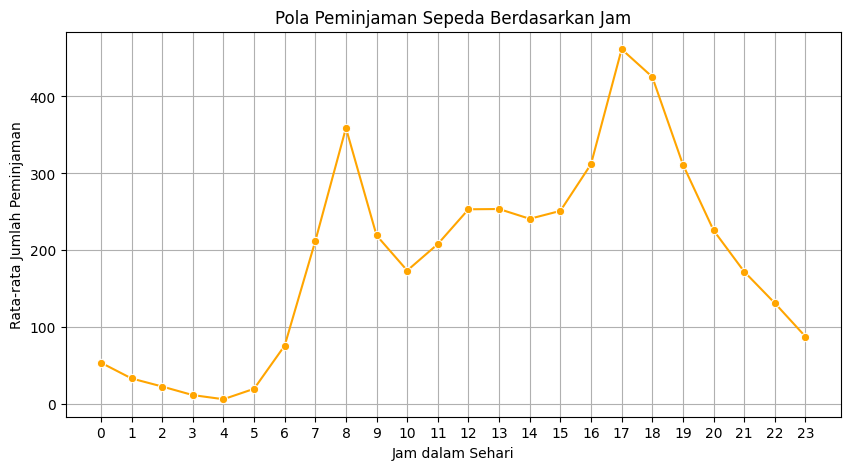

In [ ]:
hourly_rentals = hour_df.groupby('hr')['cnt'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=hour_df.groupby("hr")["cnt"].mean().index,
             y=hour_df.groupby("hr")["cnt"].mean().values,
             marker="o", color="orange")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.title("Pola Peminjaman Sepeda Berdasarkan Jam")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

**Insight:**
1.   Tren Peminjaman Sepeda Sepanjang Tahun
*   Jumlah peminjaman sepeda Tampak meningkat dari awal tahun dan mencapai puncaknya di bulan **Mei - Oktober**.

*   terjadi penurunan yang signifikan dari bulan **November - Februari**, kemungkinan ini disebabkan oleh musim dingin yang kurang kondusif untuk bersepeda.

2.   Pola Peminjaman Sepeda Berdasarkan Jam

*   Peminjaman sepeda memiliki dua puncak utama dalam sehari, yaitu pukul **7-9 pagi** dan **17-19 sore.** Ini karena banyak orang menggunakan untuk pergi dan pulang dari sekolah atau tempat kerja

*   Pada malam hari dan dini hari (pukul 00:00 - 06:00), peminjaman sepeda relatif rendah, ya wajar karena kebanyakan orang beristirahat.


### Pertanyaan 3: Bagaimana tren peminjaman sepeda berdasarkan musim?

<ipython-input-82-c0f55f8196c3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_rentals = day_df.groupby('season')['cnt'].sum().reset_index()


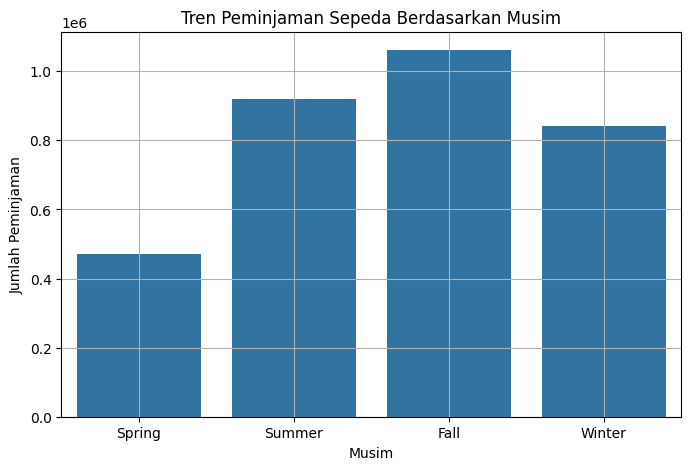

In [ ]:
seasonal_rentals = day_df.groupby('season')['cnt'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='season', y='cnt', data=seasonal_rentals)  # Menggunakan data agregat
plt.xticks([0, 1, 2, 3], ["Spring", "Summer", "Fall", "Winter"])
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjaman")
plt.title("Tren Peminjaman Sepeda Berdasarkan Musim")
plt.grid()
plt.show()

**Insight:**

Jumlah peminjaman sepeda paling tinggi terjadi pada musim gugur (fall). Ini bisa jadi karena cuaca yang lebih nyaman dibandingkan musim panas yang terik atau musim dingin yang terlalu dingin.

Musim semi (spring) memiliki jumlah
peminjaman terendah, ini mungkin karena hujan lebih sering terjadi.

### Pertanyaan 4: Bagaimana tren peminjaman sepeda berdasarkan cuaca?

<ipython-input-83-3ed6b232ef21>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_rentals = day_df.groupby('weathersit')['cnt'].sum().reset_index()


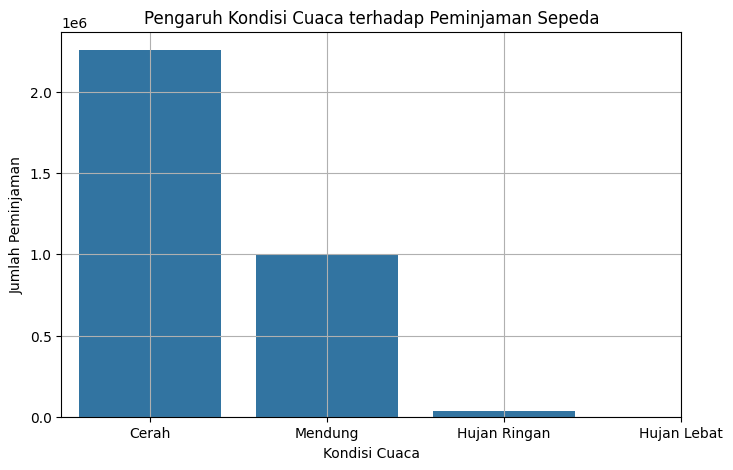

In [ ]:
# Visualisasi pengaruh cuaca terhadap peminjaman sepeda
weather_rentals = day_df.groupby('weathersit')['cnt'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='weathersit', y='cnt', data=weather_rentals)  # Menggunakan data agregat
plt.xticks([0, 1, 2, 3], ["Cerah", "Mendung", "Hujan Ringan", "Hujan Lebat"])
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Peminjaman")
plt.title("Pengaruh Kondisi Cuaca terhadap Peminjaman Sepeda")
plt.grid()
plt.show()

**Insight:**


*   Peminjaman Paling Banyak terjadi di cuaca cerah
*   Peminjaman Paling Sedkit terjadi di cuaca Ringan, Tidak ada yang meminjam saat hujan lebat

dapat disimpulkan peminjaman sepeda sangat terpengaruh cuaca, dimana orang memilih
 bersepeda saat cuaca cerah


## Analisis Lanjutan (Opsional)

## Conclusion

- Conclusion pertanyaan 1

1. Jumlah peminjaman sepeda cenderung meningkat dari awal tahun dan mencapai puncaknya sekitar bulan Mei hingga Oktober.

2. terjadi penurunan drastis dari bulan November hingga Februari, kemungkinan disebabkan oleh musim dingin yang kurang kondusif untuk bersepeda.

- Conclusion pertanyaan 2

1. Peminjaman sepeda memiliki dua puncak utama dalam sehari, yaitu sekitar pukul 07:00 - 09:00 pagi dan 17:00 - 19:00 sore. Ini karena banyak orang menggunakan untuk pergi/pulang dari sekolah atau tempat kerja

2. Pada malam hari dan dini hari (pukul 00:00 - 06:00), peminjaman sepeda relatif rendah, ya wajar karena kebanyakan orang beristirahat.

- Conclusion pertanyaan 3
1. Jumlah peminjaman sepeda paling tinggi
terjadi pada musim gugur (fall). Hal ini mungkin disebabkan oleh cuaca yang lebih nyaman dan mendukung aktivitas bersepeda dibandingkan musim panas yang terik atau musim dingin yang terlalu dingin.

2. Musim panas (summer) dan musim dingin (winter) memiliki jumlah peminjaman yang relatif sedang. Meskipun musim panas memiliki cuaca yang cerah, suhu yang tinggi mungkin membuat beberapa orang enggan bersepeda. Sementara di musim dingin, suhu yang dingin dan kemungkinan adanya salju juga dapat mengurangi aktivitas bersepeda.
3. Musim semi (spring) memiliki jumlah peminjaman terendah. Ini kemungkinan disebabkan oleh curah hujan yang lebih tinggi dan suhu yang belum terlalu hangat di musim semi, sehingga mengurangi minat orang untuk bersepeda.

- Conclusion pertanyaan 4
1. Peminjaman sepeda paling banyak terjadi pada cuaca cerah (clear). Kondisi cuaca yang cerah dan nyaman menjadi faktor utama yang mendorong orang untuk bersepeda.
2. Jumlah peminjaman menurun drastis pada cuaca mendung dan hujan ringan. Kondisi cuaca yang kurang mendukung ini membuat orang cenderung memilih alternatif transportasi lain atau menunda aktivitas bersepeda.
3. Tidak ada peminjaman sepeda saat cuaca hujan lebat. Mustahil orang beraktivitas sepeda pada kondisi seperti ini, sehingga tidak ada yang meminjam.

- Kesimpulan
Dari analisis tren peminjaman berdasarkan musim dan cuaca, dapat disimpulkan bahwa faktor cuaca memiliki pengaruh yang signifikan terhadap jumlah peminjaman sepeda. Cuaca yang cerah dan nyaman, seperti pada musim gugur atau saat cuaca cerah, cenderung meningkatkan jumlah peminjaman, sedangkan cuaca buruk seperti hujan atau suhu ekstrem akan mengurangi minat orang untuk bersepeda.